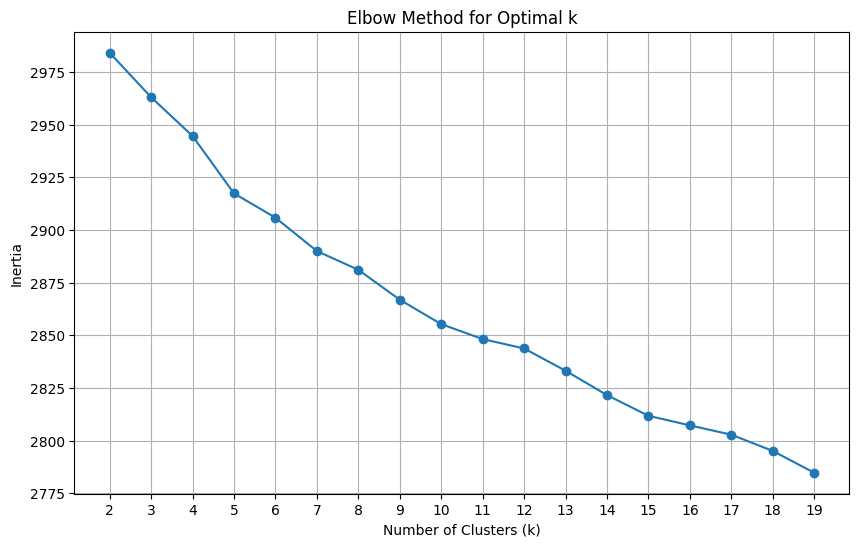

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to load the data from Excel
def load_data(file_path):
    df = pd.read_excel(file_path)
    english_texts = df['ENGLISH'].astype(str).values  # Convert all values to strings
    return english_texts

# Function to convert text data to numerical features using TF-IDF
def vectorize_text(texts):
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(texts).toarray()  # Convert text to TF-IDF feature vectors
    return x

# Main function to execute the code
def main():
    # Load the data from 'Book1.xlsx'
    file_path = 'Book1.xlsx'
    english_texts = load_data(file_path)

    # Convert text to numerical features using TF-IDF
    x = vectorize_text(english_texts)

    # Calculate distortions for different values of k
    distortions = []
    k_range = range(2, 20)  # Range of k values to test

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(x)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

# Call the main function
if __name__ == "__main__":
    main()
